<a href="https://colab.research.google.com/github/auriwan/911-emergency-call-analysis/blob/main/911_calls_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 911 Emergency calls

Pada Projek kali ini akan dilakukan analisis data 911 emergency calls dari kaggle
[Emergency 911 calls](https://www.kaggle.com/datasets/mchirico/montcoalert)

overview data:
- lat: String, Latitude
- lng: String, Longitude
- desc: String, Deskripsi dari emergency call
- zip: String, Zipcode/kodepos
- title: String, Title
- timeStamps: String, YYYY-MM-DD HH:MM:SS
- twp: String, Township
- addr: String, Address
- e: String, Dummy variabel(selalu 1)

# Setup Data

In [ ]:
import numpy as np
import pandas as pd
import os
from google.colab import files
import zipfile
import seaborn as sns
%matplotlib inline

## _Kaggle Setup_

In [ ]:
!pip install -q kaggle

In [ ]:
os.environ['KAGGLE_CONFIG_DIR']="/content/"

upload file kaggle.json

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"auriwanyasper","key":"1f2aa275cf7e43b60dd6dbd14361b24b"}'}

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!KAGGLE_CONFIG_DIR=/content kaggle datasets download -d mchirico/montcoalert

 83% 20.0M/24.2M [00:00<00:00, 41.0MB/s]
100% 24.2M/24.2M [00:00<00:00, 43.6MB/s]


## Data Loading

In [ ]:
zip_ref = zipfile.ZipFile('/content/montcoalert.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

## Data Understanding

In [ ]:
df=pd.read_csv('/content/911.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [ ]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


_Top 5 zipcode for 911 calls_

In [ ]:
df.zip.value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

_Top 5 township for 911 calls_

In [ ]:
df.twp.value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

_Unique code in the title column_

In [ ]:
df.title.nunique()

148

### Menambah fitur baru reason

Selanjutnya terdapat fitur yang perlu dipisahkan dari data title yaitu penyebabmya

In [ ]:
reason = df['title'].apply(lambda x: x.split(': '))
list_reason = reason.tolist()
s_reason = reason.apply(lambda x: x[0], list_reason)
df['Reason']=s_reason
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


_Most Reason_

In [ ]:
df.Reason.value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

### CountPlot Reason

countplot untuk reason

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


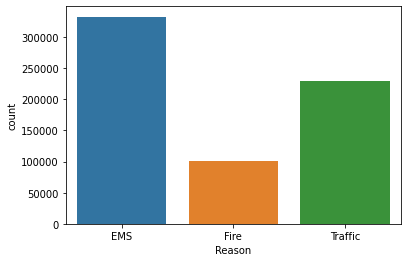

In [ ]:
sns.countplot(df['Reason'])

### Time Information

Pertama lihat tipe data pada timeStamp

In [ ]:
type(df.timeStamp[0])

str

karena masih dalam bentuk string maka kita akan ubah menjadi datatime dengan pd.datetime()

In [ ]:
df['timeStamp'] = df['timeStamp'].apply(lambda x: pd.to_datetime(x))

In [ ]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df['timeStamp']

0        2015-12-10 17:10:52
1        2015-12-10 17:29:21
2        2015-12-10 14:39:21
3        2015-12-10 16:47:36
4        2015-12-10 16:56:52
                 ...        
663517   2020-07-29 15:46:51
663518   2020-07-29 15:52:19
663519   2020-07-29 15:52:52
663520   2020-07-29 15:54:08
663521   2020-07-29 15:52:46
Name: timeStamp, Length: 663522, dtype: datetime64[ns]

Selanjutnya kita akan pisahkan antara jam, hari per minggu, dan bulan kedalam kolom tersendiri

In [ ]:
dmap = {
    0:'Mon',
    1:'Tue',
    2:'Wed',
    3:'Thu',
    4:'Fri',
    5:'Sat',
    6:'Sun',
}

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}